# How to download data from the ORFEUS Data Center using WebDC3 #
WebDC3 interface can be used to easily download data from the EIDA Federation. It can be found using following link:

[http://orfeus-eu.org/webdc3](http://orfeus-eu.org/webdc3)

Please keep in mind to connect to the WebDC3 using **HTTP** protocol. Some of the underlying services operate exclusively via HTTP. Modern browsers will block HTTPS to HTTP traffic.

![](img/webdc3-01.png)
**Fig.1 - WebDC3 landing page**

# Explore events tab:

Let's go to the "Explore events" tab and find all Groningen events stored in the KNMI event catalogue filtered using following griteria:

- Magnitude: >= 2.5
- Timespan: from 2020-01-01 till 2020-06-01
- Area: limited by a bounding box defined using following coordinates:
    - 53°N <= latitude <= 53.5°N
    - 6°E <= longitude <= 7°E

After pressing the "Search" button, we can see that one event has been found - Zijldijk earthquake with origin time 2020-05-02 03:13:15, depth 3.0 km and magnitude 2.5.

Please note:

- There are multiple event catalogues available in the WebDC3 portal provided by:
    - [GFZ](http://geofon.gfz-potsdam.de/)
    - [EMSC](http://www.emsc-csem.org/)
    - [USGS](http://earthquake.usgs.gov/)
    - [INGV](http://www.ingv.it/)
    - [ETH](http://seismo.ethz.ch/en/home/)
- User can provide own list of events by selecting "User Supplied" button

![](img/webdc3-02.png)
**Fig.2 - Event search**

# Explore stations tab

For given event, let's find all NL stations located in the initially defined area:

- Network type: Public permanent network
- Network code: NL (1993) Netherlands Seismic and Acoustic Network
- Stations: by Region, bounding box defined in previous step
- Streams: by Code, all streams selected

After clicking on the "Search" button, all stations meeting the above criteria will be added and presented on the map.

Please note:

- Networks can be filtered using network start and end date
- Various network types can be selected using the "Network Type" dropdown menu:
    - All nets
    - Virtual nets
    - All permanent nets
    - All temporary nets
    - All public nets
    - All non-public nets
    - Public permanent nets
    - Public temporary nets
    - Non-public permanent nets
    - Non-public temporary nets
- Stations can be also selected by station code or event distance and azimuth
- Streams can be also selected by sampling using target sampling rate and following options:
    - Very broad band
    - Broad band
    - Very broad band and broad band
    - Broad band / strong motion
    - Short period
    - Strong motion
    - Ocean bottom seismometer

![](img/webdc3-03.png)
**Fig.3 - Station search**

# Submit request tab (waveforms)

Let's now download all waveforms available from selected stations, starting 2 minutes before and ending 10 minutes after event origin time:

- Time window selection: Relative Mode
- Start: Origin Time: 2
- End: Origin Time: 10
- Request Type: Waveform (Mini-SEED)

Please note:

- NL network data is publicly available and does not require authentication.
- Start and end time can be set using reference to the event origin time or P/S wave arrival
- When no event is selected, waveforms can be downloaded in Absolute Mode by providing explicit start and end timestamps
- To download restricted data, user needs to provide an authentication token using EIDA Authentication System ([https://geofon.gfz-potsdam.de/eas/](https://geofon.gfz-potsdam.de/eas/))

![](img/webdc3-04.png)
**Fig.4 - Waveform request**

# Download data tab (waveforms)

After clicking the "Submit" button, download process will be initiated. When data is downloaded, it can be saved using "Save" button to local machine.

![](img/webdc3-05.png)
**Fig.5 - Waveform download progress bar**

## Browsing the waveforms using ObsPy

Due to repository limitations, this example is based on 1 station (NO.BGAR) extracted from the downloaded package.

         network: NL
         station: BGAR
        location: 
         channel: HGE
       starttime: 2020-05-02T03:11:14.395000Z
         endtime: 2020-05-02T03:23:16.870000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 144496
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 249, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 385024})


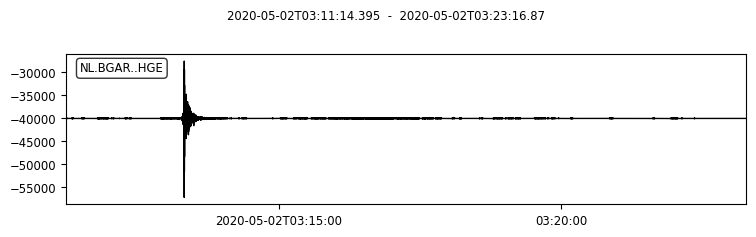

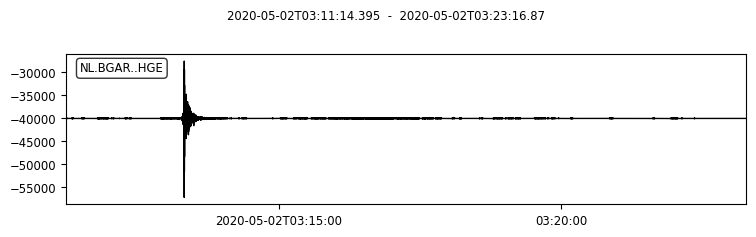

In [2]:
from obspy import read

# Load example mseed file
st = read("data/NL.BGAR.mseed")

# Print statistics
print(st[0].stats)

# Plot the waveform
st[0].plot()

# Submit request tab (metadata)

In previous step we have downloaded the raw waveforms. In order to obtain the instrumentation metadata, we need to go back to the "Submit request" tab and adjust our request criteria:

- Request Type: Metadata (StationXML)
- Metadata level: Channel

Please note:

- Station metadata can be also requested on 3 different levels:
    - Station level
    - Channel level
    - Response level
- Station metadata can be requested in text format

![](img/webdc3-06.png)
**Fig.6 - Metadata request**

# Download data tab (metadata)

After clicking the "Submit" button, metadata download will be initiated. "Save" button will be enabled upon completion of the download process.

![](img/webdc3-07.png)
**Fig.7 - Metadata download progress bar**

## Browsing the metadata using ObsPy

This example is based on 1 station extracted from the downloade package - NO.BGAR.

Please note that metadata downloaded in StationXML format can be easily viewed using any text editor.

In [1]:
from obspy import read_inventory

# Load example inventory file
inv = read_inventory("data/NL.BGAR.xml")

# Print its contents
print(inv)  

Inventory created at 2020-11-11T12:29:39.787631Z
	Sending institution: SeisComP3 (ODC)
	Contains:
		Networks (1):
			NL
		Stations (1):
			NL.BGAR (Garsthuizen)
		Channels (3):
			NL.BGAR..HGZ, NL.BGAR..HGN, NL.BGAR..HGE


***
Author: Jarek Bienkowski (KNMI)